In [1]:
from scipy.io import loadmat
from os import listdir
from os.path import isfile, join
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

In [2]:
# Set the paths for the video files and ground truth files
# by default it is assumed that the paths are in the same folders
# as the notebook

# ONSHORE/ONBORAD/NIR 별로 각각 video가 저장된 경로
# 레이블 정보인 ObjectGT 파일이 들어간 경로
# 프레임 저장할 경로

VIDEOS_PATH_ONSHORE = "VIS_Onshore/Videos"
OBJECT_ANNOTATIONS_ONSHORE_PATH = "VIS_Onshore/ObjectGT"
VIDEO_FRAMES_PATH_ONSHORE = 'VIS_Onshore_frames/'

VIDEOS_PATH_ONBOARD = "VIS_Onboard/Videos"
OBJECT_ANNOTATIONS_ONBOARD_PATH = "VIS_Onboard/ObjectGT"
VIDEO_FRAMES_PATH_ONBOARD = 'VIS_Onboard_frames/'

VIDEOS_PATH_NIR = "NIR/Videos"
OBJECT_ANNOTATIONS_NIR_PATH = "NIR/ObjectGT"
VIDEO_FRAMES_PATH_NIR = 'NIR_frames/'

In [3]:
# 각각 폴더에서 video 이름 가져와서 비디오 경로/파일 이름으로 목록을 저장함
# join은 문자열 합치기
# join(VIS_Onshore/Videos/, MVI_1478_VIS.avi) => VIS_Onshore/Videos/MVI_1478_VIS.avi 

video_files_onshore = [join(VIDEOS_PATH_ONSHORE, f) for f in listdir(VIDEOS_PATH_ONSHORE) 
                       if isfile(join(VIDEOS_PATH_ONSHORE, f))]

video_files_onboard = [join(VIDEOS_PATH_ONBOARD, f) for f in listdir(VIDEOS_PATH_ONBOARD) 
                       if isfile(join(VIDEOS_PATH_ONBOARD, f))]

video_files_nir = [join(VIDEOS_PATH_NIR, f) for f in listdir(VIDEOS_PATH_NIR) 
                       if isfile(join(VIDEOS_PATH_NIR, f))]

In [4]:
# .avi를 지운 파일 제목을 dict 배열에 저장 => 동영상 파일 이름

video_files_onshore_dict = {}
for f in listdir(VIDEOS_PATH_ONSHORE):
    if isfile(join(VIDEOS_PATH_ONSHORE, f)):
        video_files_onshore_dict[f.split('.')[0]] = join(VIDEOS_PATH_ONSHORE, f) # .을 기준으로 자르면 뒤에 .avi 없어지고 이름만 저장됨
        
video_files_onboard_dict = {}
for f in listdir(VIDEOS_PATH_ONBOARD):
    if isfile(join(VIDEOS_PATH_ONBOARD, f)):
        video_files_onboard_dict[f.split('.')[0]] = join(VIDEOS_PATH_ONBOARD, f)
        
video_files_nir_dict = {}
for f in listdir(VIDEOS_PATH_NIR):
    if isfile(join(VIDEOS_PATH_NIR, f)):
        video_files_nir_dict[f.split('.')[0]] = join(VIDEOS_PATH_NIR, f)

In [5]:
# OBJECT_ANNOTATIONS_ONSHORE_PATH의 GT파일 이름을 읽어와서 .mat 없애고 _ObjectGT를 ''로 대체한 다음
# object_gt_files_@@@_dict 배열에 저장 => GT파일 이름 목록 

object_gt_files_onshore_dict = {}
for f in listdir(OBJECT_ANNOTATIONS_ONSHORE_PATH):
    if isfile(join(OBJECT_ANNOTATIONS_ONSHORE_PATH, f)):
        object_gt_files_onshore_dict[f.split('.')[0].replace('_ObjectGT','')] = join(OBJECT_ANNOTATIONS_ONSHORE_PATH, f)
        
object_gt_files_onboard_dict = {}
for f in listdir(OBJECT_ANNOTATIONS_ONBOARD_PATH):
    if isfile(join(OBJECT_ANNOTATIONS_ONBOARD_PATH, f)):
        object_gt_files_onboard_dict[f.split('.')[0].replace('_ObjectGT','')] = join(OBJECT_ANNOTATIONS_ONBOARD_PATH, f)
        
object_gt_files_nir_dict = {}
for f in listdir(OBJECT_ANNOTATIONS_NIR_PATH):
    if isfile(join(OBJECT_ANNOTATIONS_NIR_PATH, f)):
        object_gt_files_nir_dict[f.split('.')[0].replace('_ObjectGT','')] = join(OBJECT_ANNOTATIONS_NIR_PATH, f)

In [6]:
# onshore/onboard/nir 별 각각 동영상 파일 갯수와 GT 파일 갯수 

print('Number of onshore videos: ', len(video_files_onshore_dict))
print('Number of onshore ground truth files: ', len(object_gt_files_onshore_dict))

print('Number of onboard videos: ', len(video_files_onboard_dict))
print('Number of onboard ground truth files: ', len(object_gt_files_onboard_dict))

print('Number of near infra-red videos: ', len(video_files_nir_dict))
print('Number of near infra-red ground truth files: ', len(object_gt_files_nir_dict))

Number of onshore videos:  40
Number of onshore ground truth files:  36
Number of onboard videos:  11
Number of onboard ground truth files:  4
Number of near infra-red videos:  30
Number of near infra-red ground truth files:  23


In [7]:
# GT 파일이 없는(라벨이 없는) 동영상 파일 찾아내기 => missing_files_onshore 배열에 저장

# ground truth files are missing - find the corresponding videos
missing_files_onshore = []
for key in video_files_onshore_dict.keys():
    if key not in object_gt_files_onshore_dict:
        missing_files_onshore.append(key)
        
print("Unlabelled onshore videos: ", missing_files_onshore)

missing_files_onboard = []
for key in video_files_onboard_dict.keys():
    if key not in object_gt_files_onboard_dict:
        missing_files_onboard.append(key)
        
print("Unlabelled onbord videos: ", missing_files_onboard)

missing_files_nir = []
for key in video_files_nir_dict.keys():
    if key not in object_gt_files_nir_dict:
        missing_files_nir.append(key)
        
print("Unlabelled nir videos: ", missing_files_nir)


# set whether to remove or not the missing videos from the frames generation later
remove_missing_files = True
if remove_missing_files:
    for key in missing_files_onshore:
        del video_files_onshore_dict[key]
    for key in missing_files_onboard:
        del video_files_onboard_dict[key]
    for key in missing_files_nir:
        del video_files_nir_dict[key]
        
    print()
    print('Size of video dictionaries after removing the videos without ground truth:')
    print('Number of onshore videos: ', len(video_files_onshore_dict))
    print('Number of onshore ground truth files: ', len(object_gt_files_onshore_dict))

    print('Number of onboard videos: ', len(video_files_onboard_dict))
    print('Number of onboard ground truth files: ', len(object_gt_files_onboard_dict))

    print('Number of near infra-red videos: ', len(video_files_nir_dict))
    print('Number of near infra-red ground truth files: ', len(object_gt_files_nir_dict))

Unlabelled onshore videos:  ['MVI_1485_VIS', 'MVI_1471_VIS', 'MVI_1483_VIS', 'MVI_1470_VIS']
Unlabelled onbord videos:  ['MVI_0792_VIS_OB', 'MVI_0804_VIS_OB', 'MVI_0788_VIS_OB', 'MVI_0789_VIS_OB', 'MVI_0796_VIS_OB', 'MVI_0795_VIS_OB', 'MVI_0794_VIS_OB']
Unlabelled nir videos:  ['MVI_1484_NIR', 'MVI_1474_NIR', 'MVI_1475_NIR', 'MVI_1481_NIR', 'MVI_1480_NIR', 'MVI_1483_NIR', 'MVI_1478_NIR']

Size of video dictionaries after removing the videos without ground truth:
Number of onshore videos:  36
Number of onshore ground truth files:  36
Number of onboard videos:  4
Number of onboard ground truth files:  4
Number of near infra-red videos:  23
Number of near infra-red ground truth files:  23


In [8]:
# onshore 폴더에 저장되어있는 모든 동영상 파일 목록 출력
# '비디오 이름' : '비디오 경로' 형식
print(video_files_onshore_dict)

{'MVI_1614_VIS': 'VIS_Onshore/Videos/MVI_1614_VIS.avi', 'MVI_1625_VIS': 'VIS_Onshore/Videos/MVI_1625_VIS.avi', 'MVI_1592_VIS': 'VIS_Onshore/Videos/MVI_1592_VIS.avi', 'MVI_1612_VIS': 'VIS_Onshore/Videos/MVI_1612_VIS.avi', 'MVI_1623_VIS': 'VIS_Onshore/Videos/MVI_1623_VIS.avi', 'MVI_1620_VIS': 'VIS_Onshore/Videos/MVI_1620_VIS.avi', 'MVI_1617_VIS': 'VIS_Onshore/Videos/MVI_1617_VIS.avi', 'MVI_1451_VIS_Haze': 'VIS_Onshore/Videos/MVI_1451_VIS_Haze.avi', 'MVI_1610_VIS': 'VIS_Onshore/Videos/MVI_1610_VIS.avi', 'MVI_1609_VIS': 'VIS_Onshore/Videos/MVI_1609_VIS.avi', 'MVI_1613_VIS': 'VIS_Onshore/Videos/MVI_1613_VIS.avi', 'MVI_1578_VIS': 'VIS_Onshore/Videos/MVI_1578_VIS.avi', 'MVI_1627_VIS': 'VIS_Onshore/Videos/MVI_1627_VIS.avi', 'MVI_1584_VIS': 'VIS_Onshore/Videos/MVI_1584_VIS.avi', 'MVI_1583_VIS': 'VIS_Onshore/Videos/MVI_1583_VIS.avi', 'MVI_1482_VIS': 'VIS_Onshore/Videos/MVI_1482_VIS.avi', 'MVI_1640_VIS': 'VIS_Onshore/Videos/MVI_1640_VIS.avi', 'MVI_1619_VIS': 'VIS_Onshore/Videos/MVI_1619_VIS.avi',

In [9]:
# convert a sample onshore video

# 샘플 비디오를 프레임으로 전환하여 저장하는 예제

video_name = 'MVI_1478_VIS'
vidcap = cv2.VideoCapture(video_files_onshore_dict.get(video_name))
success,image = vidcap.read()
count = 0
success = True
while success:
  cv2.imwrite(VIDEO_FRAMES_PATH_ONSHORE + video_name + "_frame%d.jpg" % count, image)     # save frame as JPEG file
  success,image = vidcap.read()
  #print('Read a new frame: ', success)
  count += 1
print("Derived %d frames" % count)

Derived 477 frames


In [11]:
# convert ALL on shore videos into images with 1 image per frame
# 비디오를 프레임 당 1 이미지로 저장 

for video_key in video_files_onshore_dict:
    vidcap = cv2.VideoCapture(video_files_onshore_dict.get(video_key))
    success,image = vidcap.read()
    count = 0
    success = True
    while success:
      cv2.imwrite(VIDEO_FRAMES_PATH_ONSHORE + video_key + "_frame%d.jpg" % count, image)     # save frame as JPEG file
      success,image = vidcap.read()
      #print('Read a new frame: ', success)
      count += 1
    print("Derived %d frames" % count) # 1 영상 당 얼만큼 프레임이 저장되는지

Derived 582 frames
Derived 995 frames
Derived 491 frames
Derived 261 frames
Derived 522 frames
Derived 502 frames
Derived 600 frames
Derived 439 frames
Derived 543 frames
Derived 505 frames
Derived 626 frames
Derived 505 frames
Derived 600 frames
Derived 539 frames
Derived 251 frames
Derived 454 frames
Derived 310 frames


KeyboardInterrupt: 

In [10]:
# boolean to determine whether to have all frames in one or separate folders (onshore/onboard/nir)
# (onshore/onboard/nir) 폴더 각각 나눠서 프레임을 저장할 것인가

SEPARATE_FOLDERS = False

In [16]:
TRAIN_PATH = './train'
TEST_PATH = './test'
VIDEO_FRAMES_FOLDER_NAME_ONSHORE = 'VIS_Onshore'
VIDEO_FRAMES_FOLDER_NAME_ONBOARD = 'VIS_Onboard'
VIDEO_FRAMES_FOLDER_NAME_NIR = 'VIS_NIR'

if SEPARATE_FOLDERS:
    TRAIN_ONSHORE = join(TRAIN_PATH, VIDEO_FRAMES_FOLDER_NAME_ONSHORE)
    TEST_ONSHORE = join(TEST_PATH, VIDEO_FRAMES_FOLDER_NAME_ONSHORE)
    TRAIN_ONBOARD = join(TRAIN_PATH, VIDEO_FRAMES_FOLDER_NAME_ONBOARD)
    TEST_ONBOARD = join(TEST_PATH, VIDEO_FRAMES_FOLDER_NAME_ONBOARD)
    TRAIN_NIR = join(TRAIN_PATH, VIDEO_FRAMES_FOLDER_NAME_NIR)
    TEST_NIR = join(TEST_PATH, VIDEO_FRAMES_FOLDER_NAME_NIR)

    folder_names = [TRAIN_PATH, TEST_PATH, TRAIN_ONSHORE, TEST_ONSHORE, TRAIN_ONBOARD, TEST_ONBOARD, TRAIN_NIR, TEST_NIR]
else:
    folder_names = [TRAIN_PATH, TEST_PATH]
    # forlder_names[0] 은 train 프레임 저장할 경로
    # forlder_names[1] 은 test 프레임 저장할 경로

# first create the folders if they don't exist
# 폴더 만들어져있지 않으면 만들기
for folder_name in folder_names:
    if not (os.path.isdir(folder_name)):
        os.mkdir(folder_name)

In [208]:
# 비디오를 5 프레임 당 1 이미지로 잘라서
# train, test 폴더에 각각 7:3 비율로 저장하기

def convert_videos_to_frames(video_dict, paths, frame_space=5, train_test_split=0.7):
    """
    Helper function to convert any video frames into jpg images and split them into training and test dataset.
    
    Parameters
    ----------
    
    video_dict : dictionary in the form <video_name>:<video_path>
    
    paths : tuple of the training and test paths to save the images. If both a set to the same path
            then all the generated frames will be place in this (same) directory.
            
    frame_space : the space between the generated frames. Default is 5.
    
    train_test_split : the ration to split the frames into train and test datasets. Default is 0.7
    """
    train_path = paths[0]
    test_path = paths[1]
    
    for video_key in video_dict:
        vidcap = cv2.VideoCapture(video_dict.get(video_key))
        
        # get total frames of video
        total_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
        
        success,image = vidcap.read()
        count = 0
        frame_count = 0
        success = True
        while success:
            if count % frame_space == 0:
                cv2.imwrite("img/" + video_key + "_frame%d.jpg" % count, image) # img 디렉토리에 전체(train+test) 사진 저장
                if (count <= train_test_split*total_frames):
                    cv2.imwrite(join(train_path, video_key) + "_frame%d.jpg" % count, image)     # save frame as JPEG file
                else:
                    cv2.imwrite(join(test_path, video_key) + "_frame%d.jpg" % count, image)
                frame_count += 1
            success,image = vidcap.read()
            #print('Read a new frame: ', success)
            count += 1
        print("Derived %d frames" % frame_count)

In [209]:
if SEPARATE_FOLDERS:
    convert_videos_to_frames(video_files_onboard_dict, [TRAIN_ONBOARD, TEST_ONBOARD])
    convert_videos_to_frames(video_files_onshore_dict, [TRAIN_ONSHORE, TEST_ONSHORE])
    convert_videos_to_frames(video_files_nir_dict, [TRAIN_NIR, TEST_NIR])
else:
    convert_videos_to_frames(video_files_onboard_dict, [TRAIN_PATH, TEST_PATH])
    convert_videos_to_frames(video_files_onshore_dict, [TRAIN_PATH, TEST_PATH])
    convert_videos_to_frames(video_files_nir_dict, [TRAIN_PATH, TEST_PATH])

Derived 120 frames
Derived 120 frames
Derived 120 frames
Derived 120 frames
Derived 117 frames
Derived 199 frames
Derived 99 frames
Derived 53 frames
Derived 105 frames
Derived 101 frames
Derived 120 frames
Derived 88 frames
Derived 109 frames
Derived 101 frames
Derived 126 frames
Derived 101 frames
Derived 120 frames
Derived 108 frames
Derived 51 frames
Derived 91 frames
Derived 62 frames
Derived 95 frames
Derived 99 frames
Derived 68 frames
Derived 51 frames
Derived 42 frames
Derived 62 frames
Derived 138 frames
Derived 104 frames
Derived 96 frames
Derived 107 frames
Derived 120 frames
Derived 120 frames
Derived 82 frames
Derived 114 frames
Derived 108 frames
Derived 89 frames
Derived 121 frames
Derived 126 frames
Derived 112 frames
Derived 114 frames
Derived 104 frames
Derived 120 frames
Derived 53 frames
Derived 62 frames
Derived 70 frames
Derived 107 frames
Derived 88 frames
Derived 120 frames
Derived 55 frames
Derived 121 frames
Derived 102 frames
Derived 120 frames
Derived 100 f

In [14]:
# try to draw image with bounding boxes
# load the object ground truth files first
# 바운딩 박스 정보 들어있는 txt 파일 열어서 objects_onshore/onboard/nir 배열에 추가

objects_onshore = []
with open("objects_onshore.txt") as f:
    for line in f: 
        line = line.strip()
        objects_onshore.append(line)
        
objects_onboard = []
with open("objects_onboard.txt") as f:
    for line in f: 
        line = line.strip()
        objects_onboard.append(line)
        
objects_nir = []
with open("objects_nir.txt") as f:
    for line in f: 
        line = line.strip()
        objects_nir.append(line)

In [15]:
print(objects_nir[0]) #텍스트 파일에서 읽어온 한 줄 = [index]

MVI_1532_NIR_frame0.jpg,2.9468988954970143,502.16525063721315,182.70178419711132,40.78164825828378,3,2,1


In [16]:
#get relevant frame information for previous video
# and for frame 0

# video_name 비디오의 frame 번째 이미지에 개체가 몇개 있는지
# 그리고 그 개체를 relevant_objects 배열에 넣음

video_name = 'MVI_1613_VIS'

frame = '100'
relevant_objects = [i for i in objects_onshore if i.startswith(video_name + '_frame' + frame)]

In [17]:
len(relevant_objects)

10

(1080, 1920, 3)
-0.315633
25.784622
161.179694
215.011470
417.288445
1048.588360
1219.871283
1374.841546
1449.879779
1776.132965


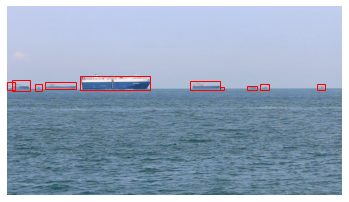

In [18]:
# draw bounding boxes for the image
# 예시로 사진 하나 띄우고 저장

im_save = Image.open(VIDEO_FRAMES_PATH_ONSHORE + video_name + "_frame" + frame +".jpg")
im = np.array(im_save, dtype=np.uint8)

# 이미지 저장
im_save.save(video_name + "_frame" + frame +"_sample.jpg")

print(im.shape)

# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(im) # y축, x축, 채널수

# for every object in frame crate a rectangle patch
for entry in relevant_objects:
    data = entry.split(',')

    # Create a Rectangle patch
    rect = patches.Rectangle((float(data[1]),float(data[2])),float(data[3]),float(data[4]),linewidth=1,edgecolor='r',facecolor='none')
    
    print('%f'% float(data[1])) #소수점 아래 6자리 까지

          
    # Add the patch to the Axes
    ax.add_patch(rect)

# 축, 테두리, 공백 없애고 사진 저장
plt.axis('off')
plt.savefig(video_name + "_frame" + frame +"_bb.jpg", bbox_inches='tight', pad_inches=0, dpi=200)

plt.show()

In [35]:
# cfg 디렉토리에 data 파일 생성
file_data = open('./cfg/smd.data', 'w')
file_data.write('classes=10\n') #클래스 갯수
file_data.write('names=cfg/classname.names\n') #클래스 이름
file_data.write('train=meta/train.txt\n') #훈련용 이미지 파일 목록
file_data.write('test=meta/test.txt\n') #검증용 이미지 파일 목록
file_data.write('backup=backup') #훈련 중 가중치 백업 디렉토리
file_data.close()

In [36]:
# cfg 디렉토리에 names 파일 생성
file_names = open('./cfg/classname.names', 'w')
file_names.write('Ferry\n')
file_names.write('Buoy\n') 
file_names.write('Vessel/ship\n') 
file_names.write('Speed boat\n') 
file_names.write('Boat\n') 
file_names.write('Kayak\n') 
file_names.write('Sail boat\n') 
file_names.write('Swimming person\n') 
file_names.write('Flying bird/plane\n') 
file_names.write('Other') 
file_names.close()

In [210]:
# train/test 이미지 읽어서 train.txt, test.txt 작성
# 1이미지 1텍스트 작성 => 텍스트에 이미지에 해당하는 객체 들어있음

def frame_bb(frame_path, meta_path):
    # frame_path : 프레임이 저장되어 있는 경로
    # meta_path : train/test 별 이미지 목록 텍스트가 들어있는 경로
    
    
    # train/test 이미지 읽어서 train.txt, test.txt 작성하는 과정
    
    isNull = 0
        
    meta_text = open(meta_path, 'w') #  프레임 목록
    
    file_list = os.listdir(frame_path)
    
    for frame_name in file_list:
        
        relevant_objects_onshore = [i for i in objects_onshore if i.startswith(frame_name)] # onshore 한 이미지의 객체 수
        relevant_objects = relevant_objects_onshore
        
        if len(relevant_objects_onshore) == 0:
            relevant_objects_onboard = [i for i in objects_onboard if i.startswith(frame_name)] # onboard 한 이미지의객체 수
            relevant_objects = relevant_objects_onboard
            
            if len(relevant_objects_onboard) == 0:
                relevant_objects_nir = [i for i in objects_nir if i.startswith(frame_name)] # nir 한 이미지의 객체 수
                relevant_objects = relevant_objects_nir
                
                if len(relevant_objects_nir) == 0: # 객체 없는 이미지
                    # img/train/test에 있는 이미지 삭제함
                    print(frame_name)
                    
                    if(frame_name == '.ipynb_checkpoints'):
                        print('.ipynb_checkpoints 파일을 삭제합니다')
                        if os.path.isfile(frame_path+'/'+frame_name):
                            os.remove(frame_path+'/'+frame_name)
                        if os.path.isfile('img/' + frame_name):
                            os.remove('img/' + frame_name)
                        continue
                    isNull = 1 
              
        meta_text.write('img/' + frame_name+'\n') # 목록에 경로 쓰기 

        name = frame_name.split('.') #.jpg 뺀 값
        frame_text = open('./img/'+name[0]+'.txt', 'w')

        
        
        # 1 이미지 당 1 텍스트 만드는 과정 => 텍스트에 객체 바운딩 박스 정보 모두 들어가야함
        # darknet 형식 갖추어서 들어가야함
        
        if isNull == 1: #객체없는 이미지 이면 내용 없는 텍스트 파일 만들기
            print("객체없는 이미지")
            frame_text.write(" ")
            frame_text.close()
            isNull = 0
            continue
            
        # for every object in frame crate a rectangle patch
        for entry in relevant_objects:
            data = entry.split(',')
            
            # classid x y width height 
            # x 최대 1920 y 최대 1080 
            
            x_min = float(data[1])
            y_min = float(data[2]) 
            width = float(data[3])
            height = float(data[4])
            
            if x_min <= 0.0: # x가 마이너스거나 0 값 이면
                width = width + x_min
                x_min = 0.00001
            if y_min <= 0.0: # y가 마이너스거나 0 값 이면
                height = height + y_min
                y_min = 0.00001
                
            x_center = (x_min+width/2)/1920.0
            y_center = (y_min+height/2)/1080.0
            width = width/1920.0
            height = height/1080.0
            
            object_type = int(data[5])-1 
            
            frame_text.write("%d %f %f %f %f\n"%(object_type,float(x_center),float(y_center),float(width),float(height)))
        
        frame_text.close()

In [211]:
#IMAGE_PATH = 'img/'
META_TRAIN_PATH = './train.txt'
META_TEST_PATH= './test.txt'

frame_bb(TRAIN_PATH, META_TRAIN_PATH)
frame_bb(TEST_PATH, META_TEST_PATH)

MVI_0790_VIS_OB_frame395.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame320.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame345.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame60.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame205.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame255.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame350.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame240.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame50.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame360.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame85.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame225.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame375.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame310.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame280.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame340.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame40.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame275.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame335.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame285.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame410.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame185.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame190.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame35.jpg
객체없는 이미지
MVI_0799_VIS_OB_frame220.jpg
객체없는 이미지
MVI_0790_VIS_OB_frame355.jpg
객체없는 이미지
MVI_0790_VIS_OB_f

In [220]:
# swimming person 데이터 모은거 train.txt, test.txt에 추가 수정

def swim_image(meta_train_path, meta_test_path):
    # meta_path : train/test 별 이미지 목록 텍스트
    
    meta_train_text = open(meta_train_path, 'a') #  train 프레임 목록 저장하는 텍스트
    meta_test_text = open(meta_test_path, 'a') #  test 프레임 목록 저장하는 텍스트
    
    for i in range(1,37): #1~36    
        meta_train_text.write('img/swim'+str(i)+'.jpg\n') # 목록에 경로 쓰기
    for i in range(37,52): #37~51
        meta_test_text.write('img/swim'+str(i)+'.jpg\n') # 목록에 경로 쓰기
    

In [221]:
swim_image(META_TRAIN_PATH, META_TEST_PATH)

In [219]:
file_list = os.listdir('./img') 
print('img 디렉토리의 파일수: %d'%len(file_list))
#file_list2 = os.listdir('PHJ/darknet/img_txt')
#print('img_txt 디렉토리의 파일수: %d'%len(file_list2))
#file_list3 = os.listdir('./train')
#print('train 디렉토리의 파일수: %d'%len(file_list3))
#file_list4 = os.listdir('./test')
#print('test 디렉토리의 파일수: %d'%len(file_list4))
#file_list5 = os.listdir('./meta')
#print('meta 디렉토리의 파일수: %d'%len(file_list5))

FileNotFoundError: [Errno 2] No such file or directory: './img'

In [167]:
r = open('./img/MVI_0801_VIS_OB_frame295.txt', mode='rt', encoding='utf-8')
r.read(500)

'3 0.000000 0.626584 0.448365 0.166147\n'

In [184]:
r = open('./img/MVI_0801_VIS_OB_frame295.txt', mode='rt', encoding='utf-8')
r.read(500)

'2 0.000000 0.626584 0.407652 0.166147\n'

In [186]:
r = open('./img/MVI_1532_NIR_frame0.txt', mode='rt', encoding='utf-8')
r.read(500)


'2 0.001535 0.464968 0.095157 0.037761\n9 0.190150 0.467989 0.028887 0.034740\n3 0.360923 0.372832 0.206457 0.175210\n'

In [207]:
# 210215수정 후 
r = open('./img/MVI_1613_VIS_frame600.txt', mode='rt', encoding='utf-8')
r.read(500)

'2 0.008839 0.427207 0.017678 0.042292\n2 0.041892 0.424186 0.056924 0.039271\n2 0.095418 0.427207 0.028037 0.033229\n2 0.164237 0.417389 0.096007 0.040782\n2 0.281059 0.435514 0.020391 0.028698\n2 0.307397 0.430983 0.013594 0.031719\n2 0.497287 0.400774 0.226848 0.092136\n2 0.626004 0.420410 0.062872 0.043803\n2 0.735605 0.428717 0.030586 0.021146\n2 0.775112 0.427207 0.024639 0.036250\n2 0.949708 0.424186 0.023789 0.036250\n3 0.360498 0.431738 0.026338 0.024167\n'

In [193]:
print(265.400880/1920)
print(677.792593/1920)
print(1570.011613/1920)
print(1780.096542/1920)
print(1298.713256/1920)


0.138229625
0.35301697552083333
0.8177143817708333
0.927133615625
0.6764131541666667
